# Dataset exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import cv2

sys.path.insert(0, "..\\Scripts")

from Utils import get_datasets, encode_image, get_validation_datasets

In [2]:
df_small, feat_small, df_unlabeled, feat_unlabeled = get_datasets()

In [3]:
dict_food_label = {}
with open("class_list.txt", "r", encoding="utf-8") as file:
    for line in file:
        key, value = line.strip().split(" ", 1)
        dict_food_label[int(key)] = value

In [4]:
df_small.head()

Image  Label
0  train_059371.jpg      0
1  train_059389.jpg      0
2  train_059425.jpg      0
3  train_059445.jpg      0
4  train_059516.jpg      0

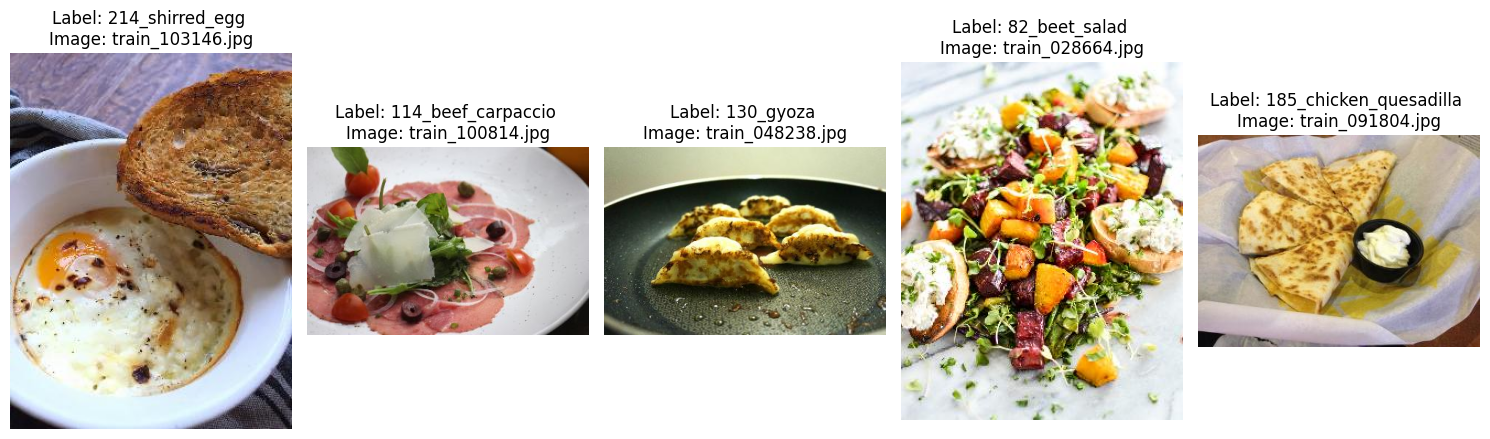

In [19]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    index = np.random.randint(0, df_small.shape[0])
    im_path = os.path.join("..\\Dataset\\train_set", df_small.iloc[index, 0])
    img = cv2.imread(im_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    label = df_small.iloc[index, 1]
    axes[i].imshow(img)
    axes[i].set_title(f"Label: {label}_{dict_food_label[label]} \nImage: {df_small.iloc[index, 0]}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [6]:
outlier_list = ['train_113176.jpg',
                'train_061467.jpg',
                'train_084869.jpg']
label_outlier_list = [
    '235 peach_melba',
    '107 crumpet',
    '20 foie_gras'
]

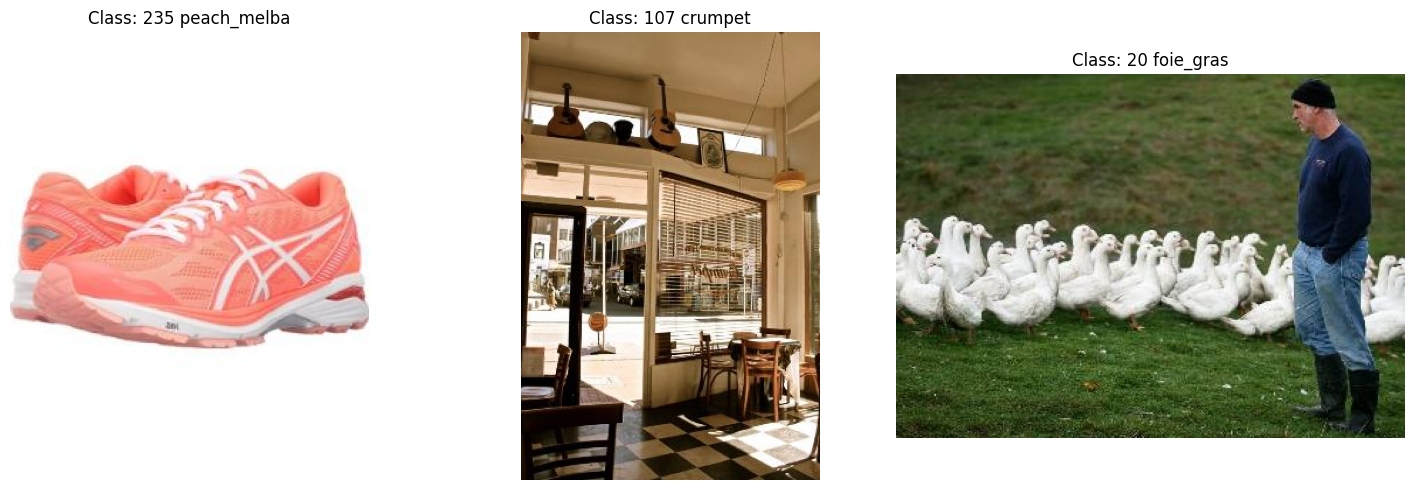

In [7]:
num_images = len(outlier_list)

cols = 3  
rows = 1

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

for ax, outlier, label in zip(axes.flat, outlier_list, label_outlier_list):
    im_path = os.path.join("..\\Dataset\\train_set", outlier)
    img = cv2.imread(im_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    ax.imshow(img)
    ax.set_title(f"Class: {label}")
    ax.axis("off")

for ax in axes.flat[num_images:]:
    ax.axis("off")

plt.tight_layout()
plt.show()


## Esempi outlier train unlabel

In [8]:
outlier_list = ['train_001150.jpg',
                'train_000676.jpg',
                'train_001331.jpg']

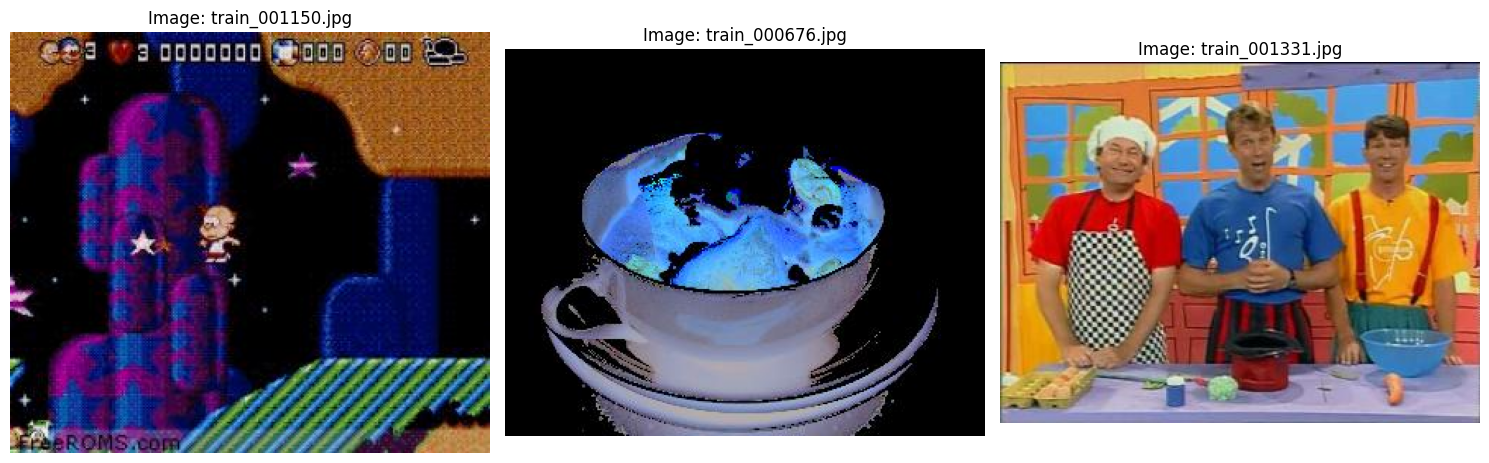

In [9]:
num_images = len(outlier_list)

cols = 3  
rows = 1

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

for ax, outlier in zip(axes.flat, outlier_list):
    im_path = os.path.join("..\\Dataset\\train_set", outlier)
    img = cv2.imread(im_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    ax.imshow(img)
    ax.set_title(f"Image: {outlier}")
    ax.axis("off")

for ax in axes.flat[num_images:]:
    ax.axis("off")

plt.tight_layout()
plt.show()

## Degraded dataset

In [10]:
df_degraded = get_validation_datasets()

In [11]:
df_degraded.head()

val_010323.jpg  247
0  val_010324.jpg  234
1  val_010325.jpg  222
2  val_010326.jpg  240
3  val_010327.jpg  218
4  val_010328.jpg  221

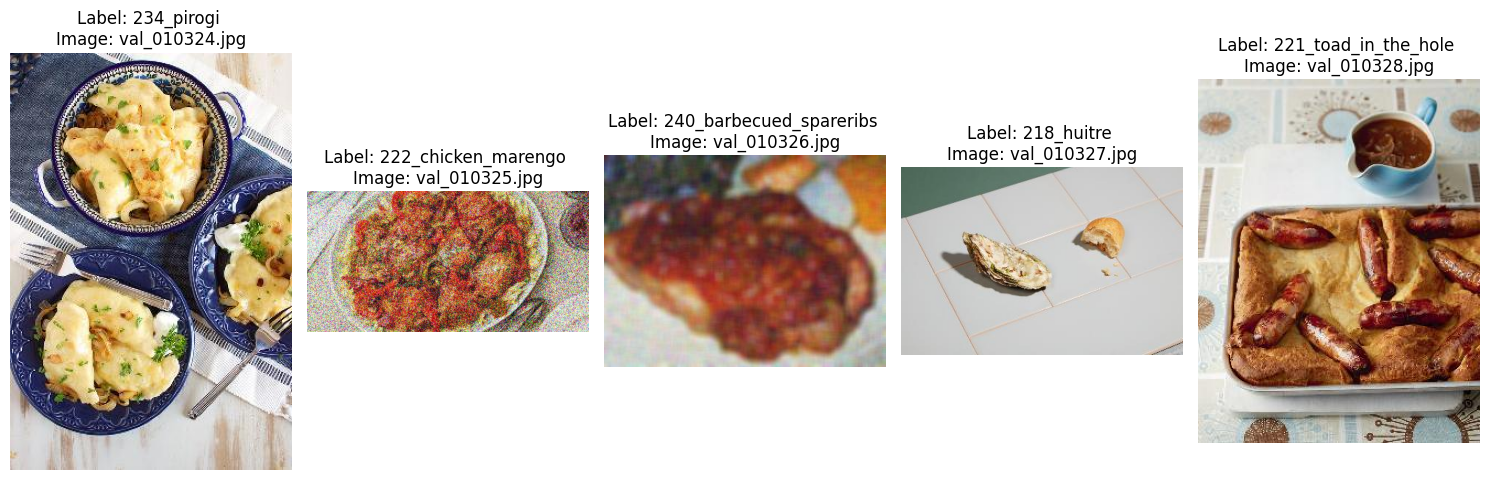

In [12]:
path_degraded = os.path.join(".." , "Dataset", "val_set_degraded")
path_validation = os.path.join(".." , "Dataset", "val_set")

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    im_path = os.path.join(path_degraded, df_degraded.iloc[i, 0])
    img = cv2.imread(im_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    label = df_degraded.iloc[i, 1]
    axes[i].imshow(img)
    axes[i].set_title(f"Label: {label}_{dict_food_label[label]} \nImage: {df_degraded.iloc[i, 0]}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [21]:
img_names = ['val_000173.jpg',        # Salt and pepper noise
              'val_000189.jpg',      # Compression artifacts    
              'val_000193.jpg',      # Blurring
              'val_000247.jpg',      # Pixelation
              'val_000254.jpg',      # JPEG compression
              'val_000414.jpg'      # Blur + Salt and pepper noise
                          ]

titles = ['Salt and pepper noise', 'Compression artifacts', 'Blurring', 'Pixelation', 'JPEG compression', 'Gaussian noise']

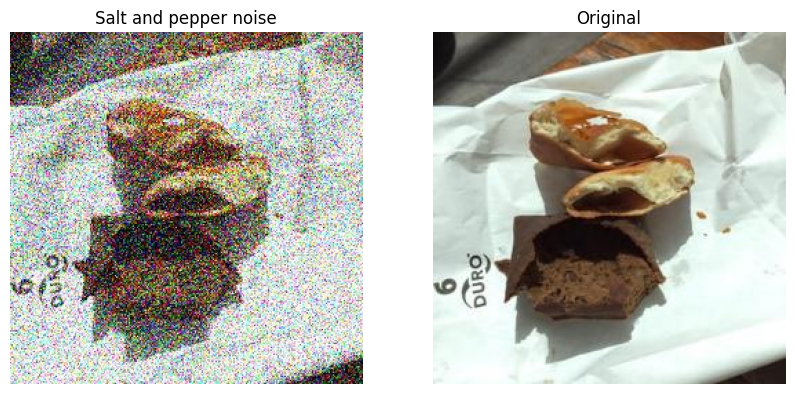

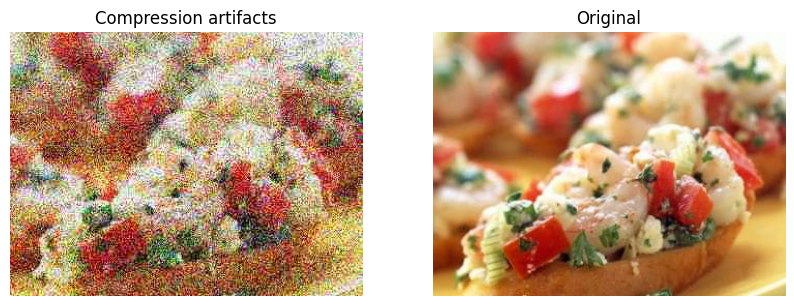

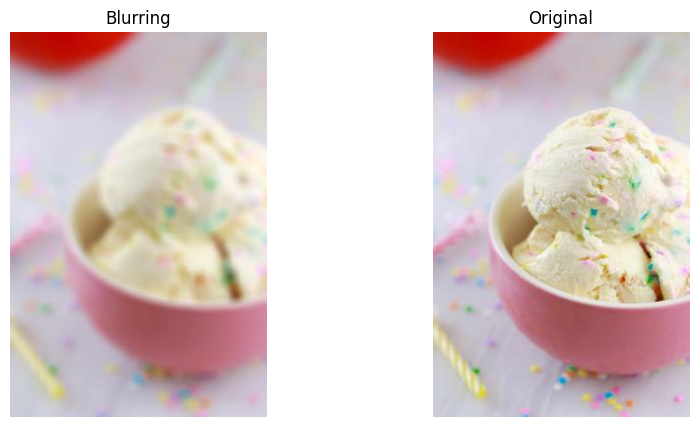

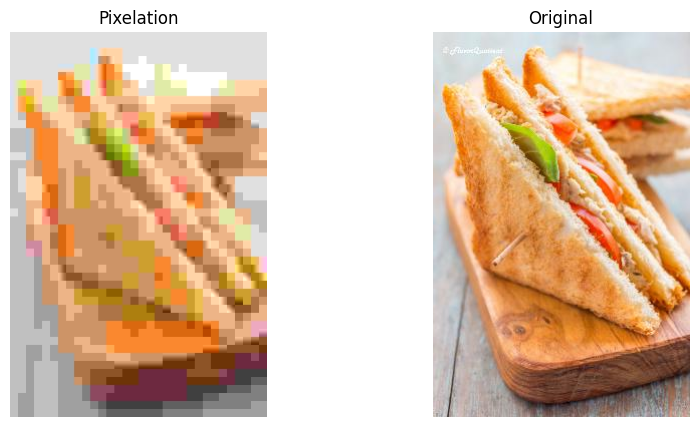

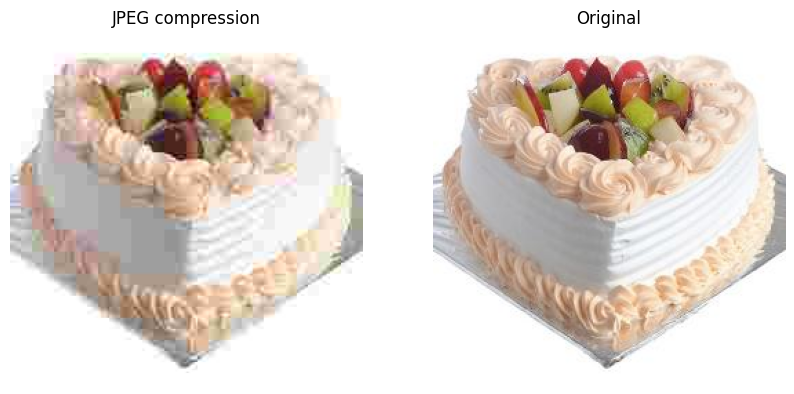

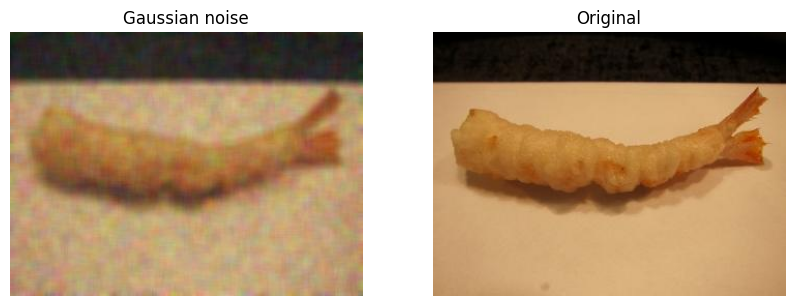

In [14]:
for i, img_path in enumerate(img_names):
    path_deg = os.path.join(path_degraded, img_path)
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    img = cv2.imread(path_deg)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    axes[0].imshow(img)
    axes[0].set_title(titles[i])
    axes[0].axis("off")

    img_val = cv2.imread(os.path.join(path_validation, img_path))
    img_val = cv2.cvtColor(img_val, cv2.COLOR_BGR2RGB)
    axes[1].imshow(img_val)
    axes[1].set_title("Original")
    axes[1].axis("off")


    plt.show()

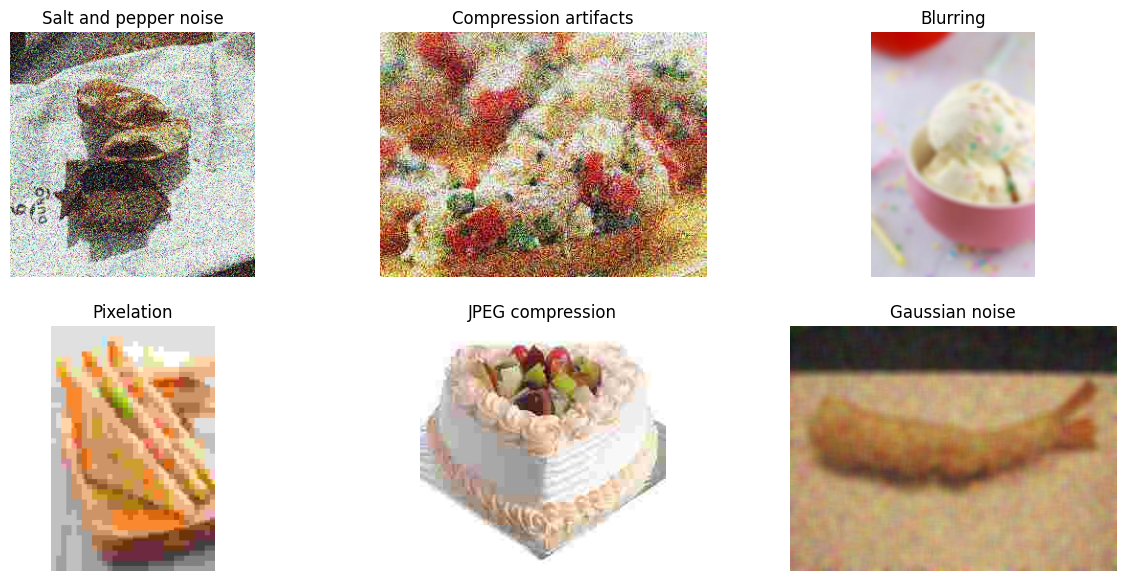

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(15, 7))

axes = axes.flatten()

for i, img_path in enumerate(img_names):
    path_deg = os.path.join(path_degraded, img_path)
    img = cv2.imread(path_deg)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    axes[i].imshow(img)
    axes[i].set_title(titles[i])
    axes[i].axis("off")

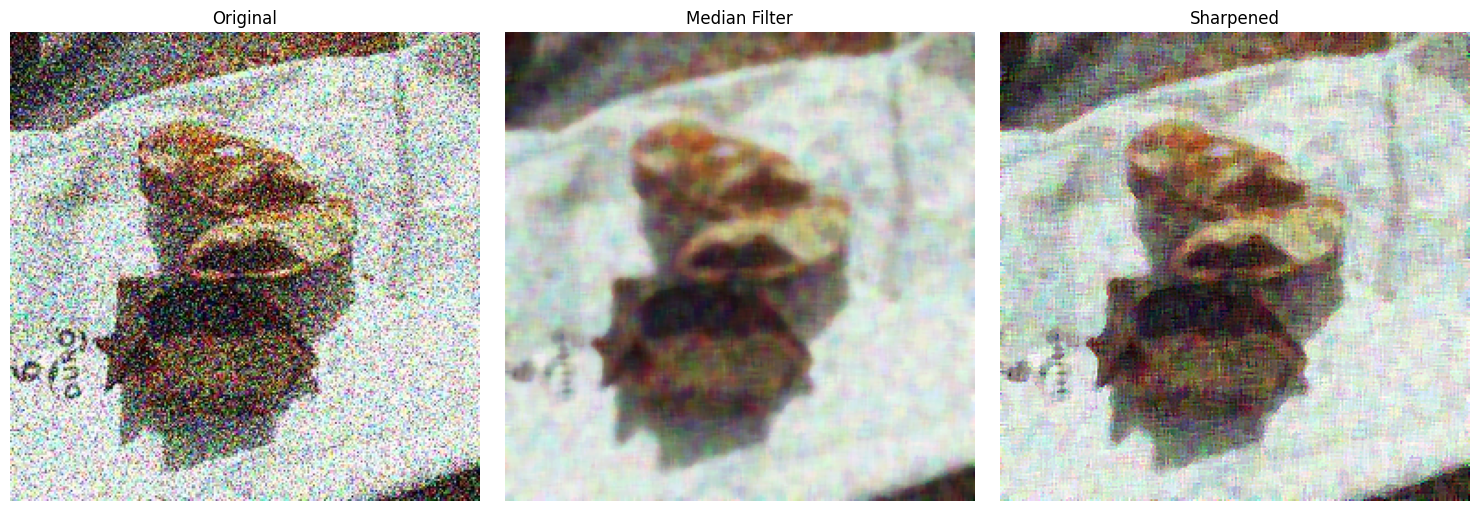

In [15]:
img = cv2.imread(os.path.join(path_degraded, img_names[0]))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_filtered = cv2.medianBlur(img, 7)

kernel = np.array([[ 0, -1,  0],
                   [-1,  5, -1],
                   [ 0, -1,  0]])

img_sharpened = cv2.filter2D(img_filtered, -1, kernel)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

titles = ["Original", "Median Filter", "Sharpened"]
images = [img, img_filtered, img_sharpened]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()
plt.show()